<a href="https://colab.research.google.com/github/zachmakki15/ADVDS/blob/main/Project6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zach Makki

Advanced Data Science

Project #6

03/06/2022

#Data Visualization

In [42]:
#Import the needed libs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#Import training dataset
dataFrame = pd.read_csv("https://raw.githubusercontent.com/zachmakki15/ADVDS/main/fetal_health.csv")
#Check data info
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [43]:
#Visualize data
dataFrame.head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


This dataset contains numeric attributes extraced from Cardiotocogram exams, the targets attribute (fetal health) represents classifications made by medical experts where 1 = normal, 2 = Suspect, 3 = Pathological

The purpose of this study will be to create a model which can predict fetal health based on the numeric attribites provided. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f8378c610>,
      dtype=object)

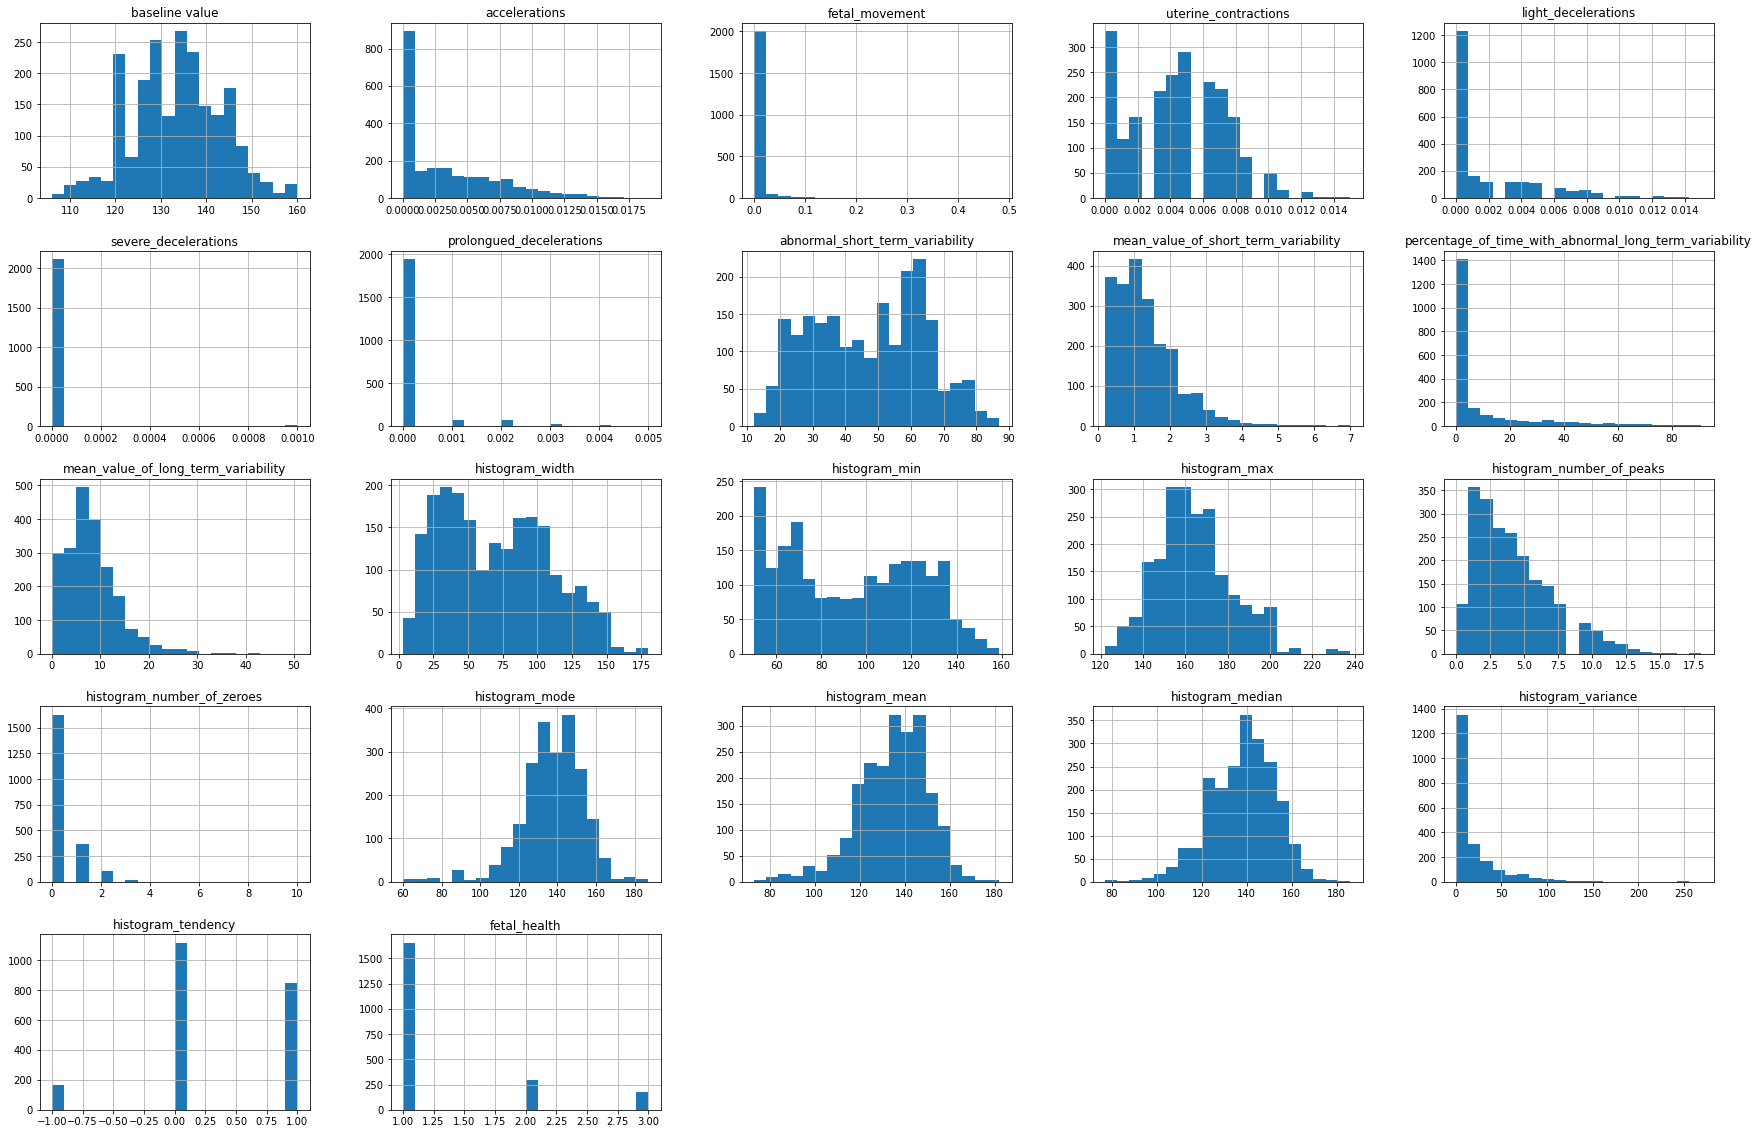

In [44]:
#Attribute distrbition
dataFrame.hist(bins=20,figsize=(30,20))

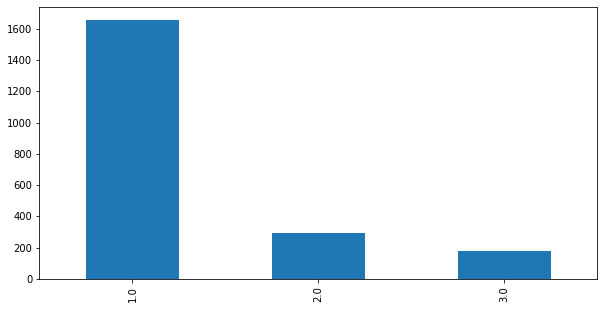

In [45]:
#Individual historgram of target
dataFrame['fetal_health'].value_counts().plot(kind='bar', figsize=(10,5))

The dataset does not have any null vales (seen from info) and the 0 values make up a large portion of the dataset and most likley do not represent missing values in all attributes. The attributes in which 0s may represent missing values are histogram_number_of_peaks, histogram_width, mean_value_of_short_term_variablity and mean_value_of_long_term_variablity. These attributes will be imputed using their respective medians.

To further inspect the attributes a correlation check with the target attribute (fetal health) will be done. Also, the target attribute distribition is skewed with the majority of the instances in the dataset classfied as Normal (1). 

#Data Normalization and Correlation

In [46]:
#Impute numeric attributes
dataFrame.histogram_number_of_peaks.replace(0., dataFrame.histogram_number_of_peaks.median(), inplace=True)
dataFrame.histogram_width.replace(0., dataFrame.histogram_width.median(), inplace=True)
dataFrame.mean_value_of_long_term_variability.replace(0., dataFrame.mean_value_of_long_term_variability.median(), inplace=True)
dataFrame.mean_value_of_short_term_variability.replace(0., dataFrame.mean_value_of_short_term_variability.median(), inplace=True)

In [47]:
#Attribute correlation
corr_matrix = dataFrame.corr()
corr_matrix['fetal_health'].sort_values(ascending=False)

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
histogram_variance                                        0.206630
baseline value                                            0.148151
severe_decelerations                                      0.131934
fetal_movement                                            0.088010
histogram_min                                             0.063175
light_decelerations                                       0.058870
histogram_number_of_peaks                                -0.005673
histogram_number_of_zeroes                               -0.016682
histogram_max                                            -0.045265
histogram_width                                          -0.068789
mean_value_of_short_term_variability                     -0.10

Text(0.5, 1.0, 'Correlation Heatmap')

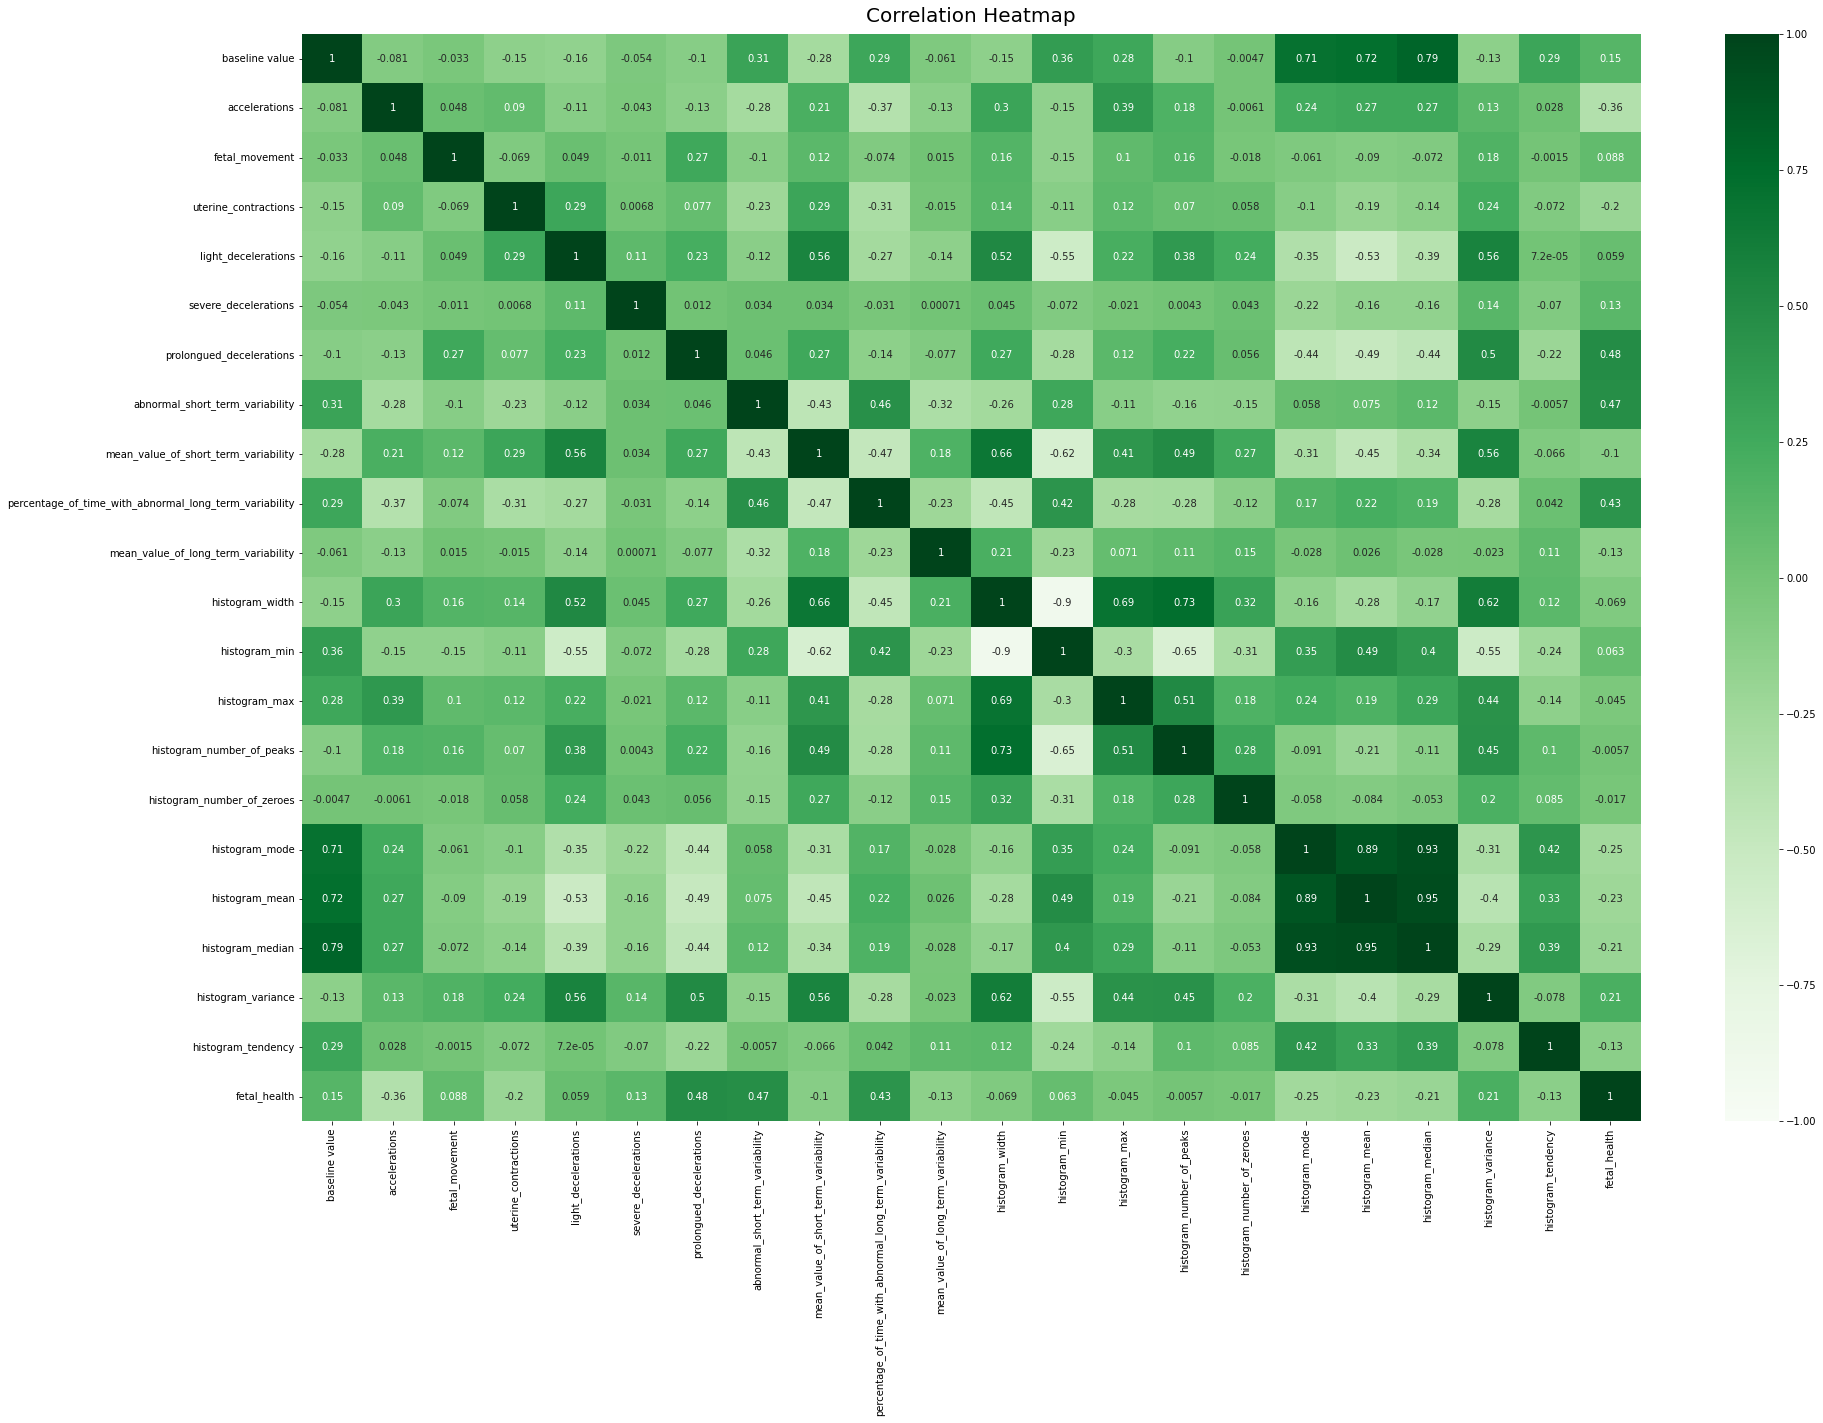

In [48]:
#Create correlation matrix heatmap
plt.figure(figsize=(30, 20))
heatmap = sns.heatmap(dataFrame.corr(), vmin=-1, vmax=1, annot=True, cmap='Greens')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12)

From the heatmap and list displayed above the attributes which have the highest correlation to the target attribute (fetal_health) are prolongued_decelerations, abnormal_short_term_variability, and percentage_of_time_with_abnormal_long_term_variability. These attributes have a mild correlation with the target. Attributes which have a weak correlation but something above 0 include, histogram_variance, and severe_decelerations.

The data will be normalized and the correlation will be checked again to see if any difference has been made.

In [49]:
#Seperate x and y (target) so that y values will not be changed
x = dataFrame.drop(columns=['fetal_health'])

#Normalize using standard scalar
from sklearn.preprocessing import StandardScaler
myscalar = StandardScaler()
x_arr = myscalar.fit_transform(x)
x_tr = pd.DataFrame(x_arr, columns=x.columns, index=x.index)
x_tr.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
count,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,...,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03
mean,4.161509e-16,-1.803982e-16,-1.958452e-15,-2.625683e-15,-5.127706e-15,7.254767e-16,4.324961e-15,2.687304e-16,-2.481552e-16,2.291362e-15,...,8.564279e-17,-6.120326e-17,-4.047144e-17,-4.797041e-16,8.397171e-17,6.141215e-17,-4.183964e-16,1.404751e-16,-3.634597e-17,5.783500e-16
std,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,...,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00
min,-2.775197e+00,-8.223883e-01,-2.032096e-01,-1.482465e+00,-6.384375e-01,-5.747560e-02,-2.687543e-01,-2.035639e+00,-1.282833e+00,-5.353613e-01,...,-1.731757e+00,-1.474609e+00,-2.342558e+00,-1.145594e+00,-4.584438e-01,-4.729191e+00,-3.951945e+00,-4.223849e+00,-6.492081e-01,-2.162031e+00
25%,-7.423728e-01,-8.223883e-01,-2.032096e-01,-8.034341e-01,-6.384375e-01,-5.747560e-02,-2.687543e-01,-8.720881e-01,-7.166031e-01,-5.353613e-01,...,-8.587648e-01,-8.993760e-01,-6.703135e-01,-7.897301e-01,-4.584438e-01,-5.160773e-01,-6.164580e-01,-6.285137e-01,-5.801731e-01,-5.245255e-01
50%,-3.088439e-02,-3.048813e-01,-2.032096e-01,-1.244037e-01,-6.384375e-01,-5.747560e-02,-2.687543e-01,1.169297e-01,-1.503732e-01,-5.353613e-01,...,-7.563980e-02,-1.960840e-02,-1.128988e-01,-4.338661e-01,-4.584438e-01,9.451891e-02,8.912573e-02,6.289690e-02,-4.075856e-01,-5.245255e-01
75%,6.806040e-01,7.301328e-01,-1.389076e-01,8.941419e-01,3.752430e-01,-5.747560e-02,-2.687543e-01,8.150599e-01,4.158567e-01,6.270688e-02,...,7.588376e-01,8.939964e-01,5.559989e-01,6.337257e-01,-4.584438e-01,6.440555e-01,6.664215e-01,6.851664e-01,1.792117e-01,1.112980e+00
max,2.713428e+00,4.093929e+00,1.010654e+01,3.610264e+00,4.429965e+00,1.739869e+01,8.208570e+00,2.327675e+00,6.417893e+00,4.412293e+00,...,2.812936e+00,2.213648e+00,4.123453e+00,4.904093e+00,1.370800e+01,3.025381e+00,3.039749e+00,3.312527e+00,8.635997e+00,1.112980e+00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f82aef890>,
      dtype=object)

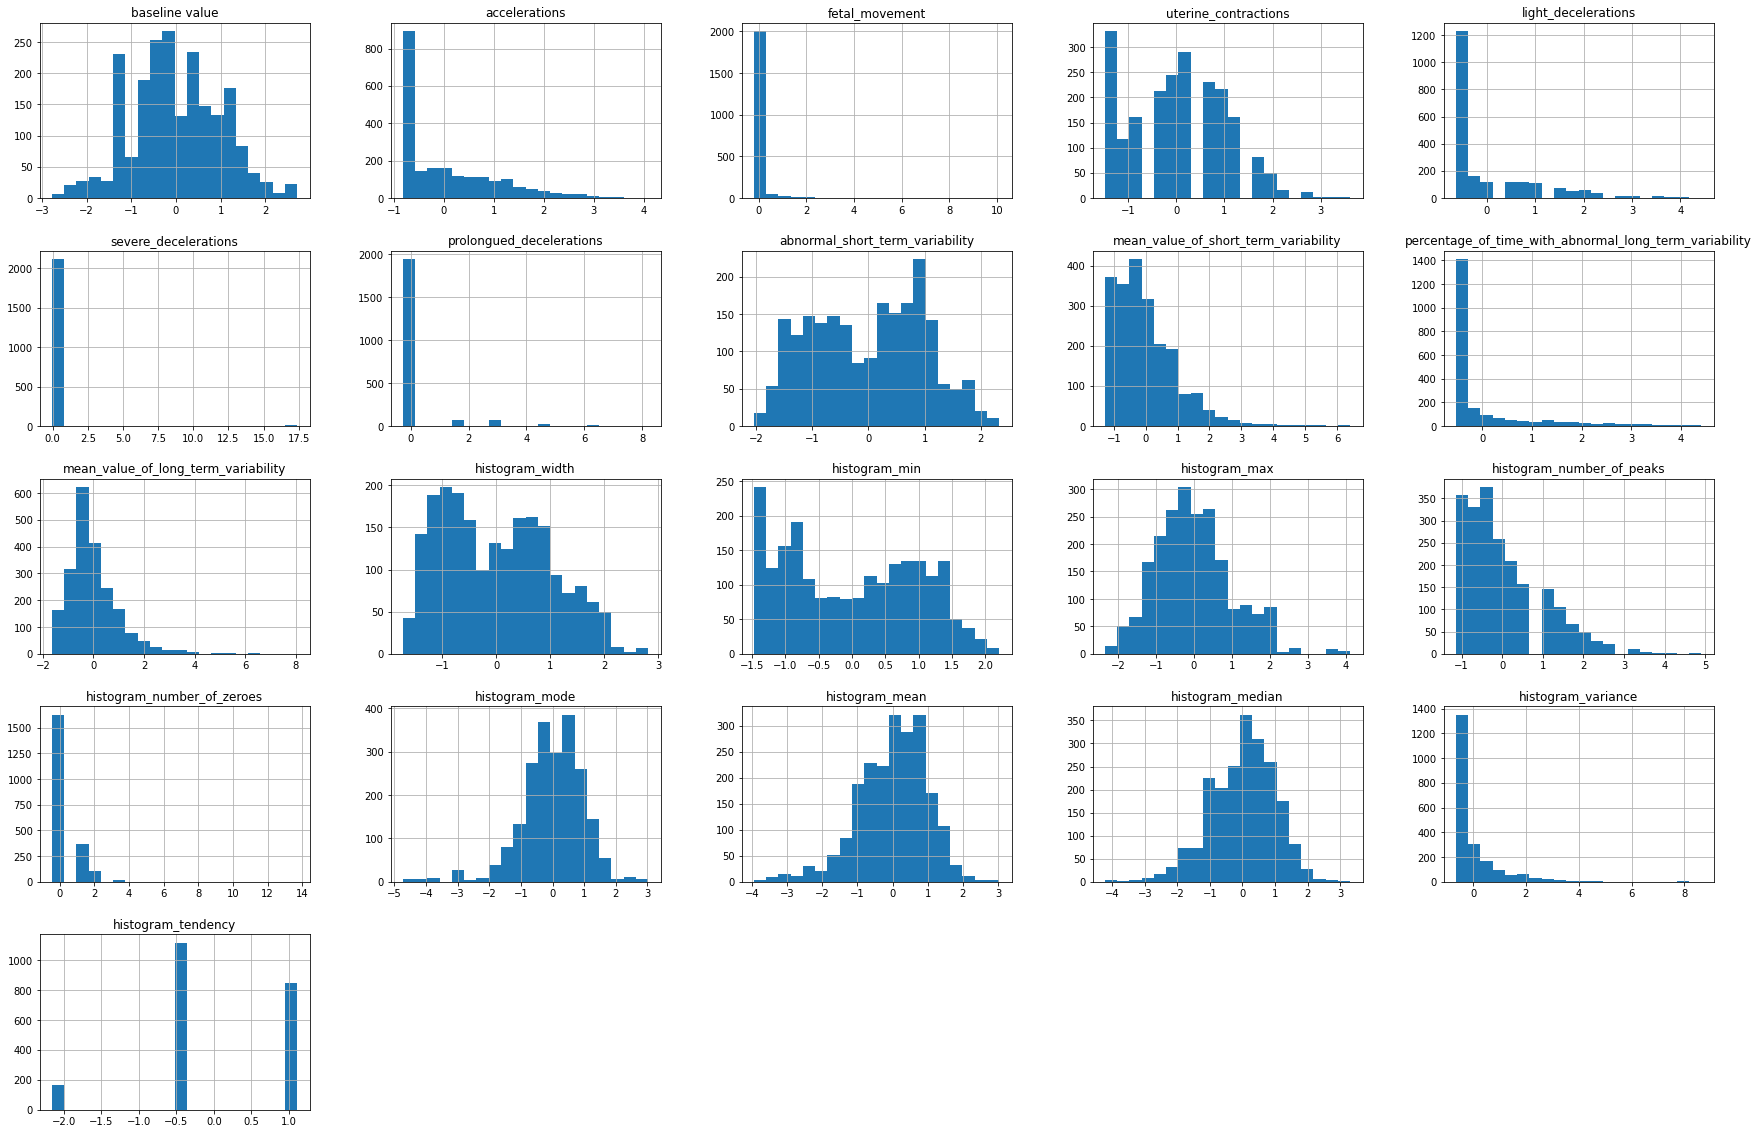

In [50]:
#New data distributions
x_tr.hist(bins=20, figsize=(30,20))

In [51]:
#Normalized data correlation matrix
xy = pd.concat([x_tr,dataFrame['fetal_health']], axis=1)
corr_matrix = xy.corr()
corr_matrix['fetal_health'].sort_values(ascending=False)

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
histogram_variance                                        0.206630
baseline value                                            0.148151
severe_decelerations                                      0.131934
fetal_movement                                            0.088010
histogram_min                                             0.063175
light_decelerations                                       0.058870
histogram_number_of_peaks                                -0.005673
histogram_number_of_zeroes                               -0.016682
histogram_max                                            -0.045265
histogram_width                                          -0.068789
mean_value_of_short_term_variability                     -0.10

No major change to correlation matrix after normalization, the NN model will now be created.

#ANN Sequential Model
Now that the data has been visualized, normalized, and correlated an ANN will be created to attempt to accuractly make predictions on fetal health based on the numeric attributes provided.

In [52]:
#Get y
y = xy['fetal_health']

#The keras model layer density is 0 indexed, the data that is in the dataset is 1 indexed. To deal with this I will change the data from 1,2,3
#to 0,1,2 where 0 is 1, 1 is 2, and 2 is 3
yList = []
for i in y:
  if (i == 1): 
    yList.append(0)
  if (i == 2): 
    yList.append(1)
  if (i == 3): 
    yList.append(2)

dataFrame['updated_fetal_health'] = yList

#Seperate training and testing data using 80/20 split
from sklearn.model_selection import train_test_split
x_Train, x_Test, y_Train, y_Test = train_test_split(x_tr, dataFrame['updated_fetal_health'], test_size=0.2, random_state=42)

#Import the libs needed for neural networks
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, Flatten

#Intialize the neural network
myNeural_Network = keras.models.Sequential([keras.layers.Flatten(input_shape=[x_Train.shape[1],]), keras.layers.Dense(100, activation="relu"), 
        keras.layers.Dense(3, activation="softmax")])

#Summarize the network created
myNeural_Network.summary()

Model: "sequential_86"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_86 (Flatten)        (None, 21)                0         
                                                                 
 dense_172 (Dense)           (None, 100)               2200      
                                                                 
 dense_173 (Dense)           (None, 3)                 303       
                                                                 
Total params: 2,503
Trainable params: 2,503
Non-trainable params: 0
_________________________________________________________________


In [53]:
#Compile the network
myNeural_Network.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

#Run the model
myNN_History = myNeural_Network.fit(x_Train, y_Train, epochs=100, batch_size=42, validation_data=(x_Test, y_Test), verbose=0)

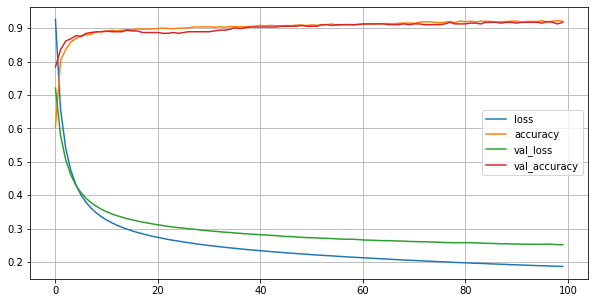

In [54]:
#Plot the model and accuracy loss graph
pd.DataFrame(myNN_History.history).plot(figsize=(10, 5))
plt.grid(True)
plt.show()

Based on the accuracy and loss graph the above ANN performed well on the fetal health dataset.

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       333
           1       0.73      0.75      0.74        64
           2       0.89      0.83      0.86        29

    accuracy                           0.92       426
   macro avg       0.86      0.85      0.85       426
weighted avg       0.92      0.92      0.92       426



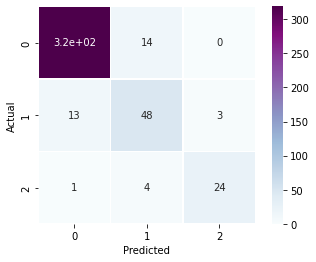

In [55]:
#Create the confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
y_Pred = myNeural_Network.predict(x_Test)
y_Pred = np.argmax(y_Pred, axis=1)

#Labels
labels = [0,1,2]
confusionMatrix = confusion_matrix(y_Test, y_Pred, labels=labels)

#Plot confusion matrix
sns.heatmap(confusionMatrix, annot=True, linewidths=.5, square = True, cmap="BuPu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

#Print classification report
classReport = classification_report(y_true=y_Test, y_pred = y_Pred, labels = labels)
print(classReport)

The confusion matrix shows that while the model overall performed well, it did much better in prediciting normal (0) fetal health then it did for suspect (1) and pathelogical (2) cases. This is most likley due to the uneven distribution of the target attribute in the dataset, with there being far more normal instances then suspect and pathelogical instances.

The same model will now be tested through k-cross folds validation.

In [56]:
#The same model will now be tested with cross validation
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

#Re-create model in callable function for kerasClassifier
def create_model(neurons=100):
  my_model = keras.models.Sequential([keras.layers.Flatten(), keras.layers.Dense(neurons, activation="relu"), 
        keras.layers.Dense(3, activation="softmax")])
  my_model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
  return my_model

estimator = KerasClassifier(build_fn=create_model, epochs=100, verbose=0)
kfold = StratifiedKFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, x_tr, dataFrame['updated_fetal_health'], cv=kfold)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  del sys.path[0]


In [57]:
#Display results
accuracy = results.mean()*100
percent_Error = results.std()*100

print("Model Accuracy: " + str(accuracy))
print("Percent error: +/- " + str(percent_Error))

Model Accuracy: 91.25147819519043
Percent error: +/- 1.7171035164988266


Model accuracy calculated through K-cross folds validation is similar to the accuray shown with the accuracy/loss graph and the confusion matrix displayed above.

#ANN Grid Search
Even though the model has performed well on this dataset, we will try to further optimize it using Grid Search, the hyper-parameters that will be grid searched are hidden layer neuron counts, batch sizes, and number of epochs. 

In [58]:
#Run a grid search experimenting with different numbers of neurons in the hidden layer, batch sizes, and number of epochs
from sklearn.model_selection import GridSearchCV
ann_GridSearch_Params = {'neurons':[100, 150], 'batch_size':[42,60,100], 'epochs':[100, 150]}
grid = GridSearchCV(estimator, ann_GridSearch_Params, cv=3)
grid.fit(x_tr, dataFrame['updated_fetal_health'])
print("The best NN grid search accuracy: %.2f\n" % grid.best_score_)
print("The best NN hyperparameters:", grid.best_params_)

The best NN grid search accuracy: 0.85

The best NN hyperparameters: {'batch_size': 60, 'epochs': 150, 'neurons': 100}


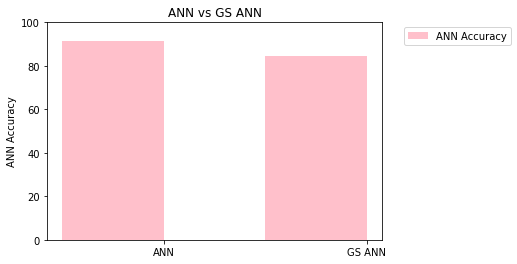

In [62]:
#Create bar graph
labels = ['ANN', 'GS ANN']
modelScores = [accuracy, grid.best_score_*100]

x = np.arange(len(labels))
width = 0.5

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, modelScores, width, label='ANN Accuracy', color='pink')

ax.set_ylabel('ANN Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,100)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.4, 1.0), loc='upper right')

plt.title('ANN vs GS ANN')
plt.show()

The above grid search took a very long time to run (over 3 minutes) and did not provide an improvement in model accuracy over the orginally tested model. This is surprising as the original model hyper-parameters (batch_size = 42, neurons = 100, number of epochs = 100) are included in the hyper-parameter options for this grid search, I would have assumed that the grid search would have at least returned the same level of accuracy as the original model. Perphas the grid search is not properly changing the ANNs hyper-parameters. 84% is still a decent result though.

#Report Summary

The fetal health dataset is composed of numeric attributes extracted from Cardiotocogram exams. The attributes represent the overall health of a fetus. The objective of this report is to create an ANN (Artificial Neural Network) capable of using the numeric attributes provided to determine fetal health. The determination will one of three options, normal (no health issues), suspect (possible health issues), and pathelogical (clear health issues). The training instances in this dataset have been labeled by renowned medical experts. 

****

**Data Visualization Summary**

In this report the dataset was analyzed using histograms for the numeric attributes, and a bar graph for the target attribute. One thing that stood out right away from visual analysis was the high number of values equal to 0 in the dataset. Multiple numeric attributes such as all of the accelerations/decelerations attributes, percentage_of_time_with_abnormal_long_term_variability, histogram_number_of_zeroes, and histogram_variance mostly consisted of values equal to 0, while other numeric attributes had a sparse amount of 0 values. Due to this the attributes that had a high amount of 0 values were not imputed, as I concluded that 0 values in those attributes most likley indicate the fetus may be healthy. The attributes that did not have a high frequency of 0 values and for which 0 values seemed to be missing data based on the attribute description provided on Kaggle were imputed using their respective medians. These attributes are histogram_number_of_peaks, histogram_width, mean_value_of_short_term_variablity and mean_value_of_long_term_variablity. The second thing that stood out was the distribution of categories in the target attribute, the distribution was highly skewed with the overwhelming majority of instances being labeled as normal (1). This is most likely due to the fact that the overwhelming number of fetuses are healthy in the area in which this data was gathered. This lack of an even distribution will make it tough for our ANN to learn about suspect and pathelogical instances as well as it will for normal instances.

****

**Data Normalization Summary**

After data visualization was complete the dataset was normalized using median imputing for the attributes named above, and the sckit-learn standard scalar (all numeric attributes except target). After imputing and scaling were performed the dataset was visualized again showing a slight improvement in data distribution for multiple numeric attributes.

****

**Data Correlation Summary**

Both before and after scaling the numeric attributes a correlation matrix was created comparing the numeric attributes to the target attribute (fetal health). Visulization of the correlation matrix in both list and heatmap form showed the attributes with the highest correlation to the target attribute, these were prolongued_decelerations, abnormal_short_term_variability, and percentage_of_time_with_abnormal_long_term_variability. While they did have the highest correlation, at best the correlation was mild. No major difference was made to the correlation matrix after scaling was done.

****

**ANN Model Peformance Summary**

After the dataset was imputed and scaled a sequential ANN with one hidden layer was created (100 neurons). The ANN created uses 0-indexing for its output layer, this means that if a target attribute has three numeric categories the ANN excepts them to be 0, 1, and 2, in this dataset the target attributes values are 1, 2, and 3. To work around this an additional column was added to the dataset updating the target attribute from 1,2,3 to 0,1,2, this new column was used as the y in the created ANN. The first method used to test the ANN was the model accuracy/loss graph. This showed a good performance as the accuracy and validation accuracy lines reach a deseriable accuracy score quickly and stay there. The next method used to test the model created was a confusion matrix and classification report, this also showed good model performance but provided more detail. This detail showed that as expected the model was much better at classifying normal fetal health then it was for suspect and pathelogical. This poses a problem if this model was ever to be used in the real world as the most important classifications are suspect and pathelogical (the whole point is to find issues early enough to make a difference). The third method used to test the model was k-cross folds validation. For this step the model needed to be re-created in a callable function, the results showed the same as the previous two methods with a model accuracy score of on average 90%. 

****

**Grid Search Test**

Even though the ANN model created in the previous section had an overall solid performance (90% accuracy), some things still need to be improved upon, such as the ability to accuratly classify suspect and pathelogical instances. To do so a Grid Search attempting to optimize the hyper-parameters batch-size, total neurons in the hidden layer, and total number of epochs was created. The orginal plan was to start with just these three parameters and then expand to include more such as the number of hidden layers but the grid search took over three minutes to complete and provided a less accurate model (best performing combo was 84%). Due to this no additional hyper-parameters were added to the grid search optimization. Reasons for the lack of improvement via Grid Search may be due to a mistake made which I have yet to identify. The original parameters were passed to the Grid Search so at worst I assumed it would return the same accuracy as the original model.

****

**Total Summary**

In summary an ANN was modeled using the fetal health dataset that can very accuratly predict instances of normal fetal health. The model performed somewhat well in instances of suspect and pathelogical health but left alot to improve upon. To increase the accuracy of suspect and pathelogical classifications more training instances of those two types will need to be passed to the model.